# IMDB Machine Learning Project

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Managing warning messages
import warnings
warnings.filterwarnings("ignore")

### Importing data

In [3]:
movies = pd.read_csv("datasets/peliculas.csv", encoding="utf-8")
movies.head(5)

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [4]:
# Checking dataset dimension
movies.shape

(5043, 19)

In [5]:
# Displaying information about the dataset
movies.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

### First iteration: Separating columns (numeric vr object type)

In [6]:
# Dataset only with numeric columns
numeric_columns = movies.select_dtypes([float, int]).columns
movies_num = movies[numeric_columns]
movies_num.head(5)

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,NaN,7.1,NaN


In [7]:
movies_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title_year    4935 non-null   float64
 1   aspect_ratio  4714 non-null   float64
 2   duration      5028 non-null   float64
 3   duration.1    5028 non-null   float64
 4   budget        4551 non-null   float64
 5   imdb_score    5043 non-null   float64
 6   gross         4159 non-null   float64
dtypes: float64(7)
memory usage: 275.9 KB


In [8]:
# Dataset only with string (object) values
object_columns = movies.select_dtypes([object]).columns
movies_obj = movies[object_columns]
movies_obj.head(5)

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Color,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Color,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Color,English,UK,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Color,English,USA,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN


In [9]:
movies_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_title     5043 non-null   object
 1   color           5024 non-null   object
 2   language        5031 non-null   object
 3   country         5038 non-null   object
 4   genres          5043 non-null   object
 5   content_rating  4740 non-null   object
 6   plot_keywords   4890 non-null   object
 7   director_name   4939 non-null   object
 8   actor_1_name    5036 non-null   object
 9   actor_2_name    5030 non-null   object
 10  actor_3_name    5020 non-null   object
dtypes: object(11)
memory usage: 433.5+ KB


### Checking information of the dataset

In [10]:
movies_num.describe()

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,1.221550e+10,9.500000,7.605058e+08


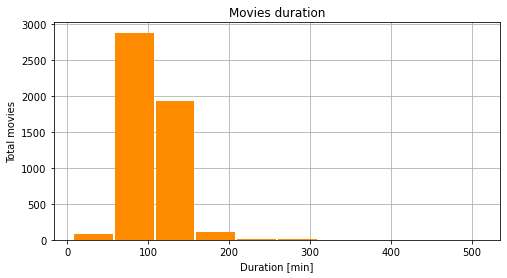

In [11]:
# Plotting duration of the films
ax = movies_num["duration"].hist(figsize=(8, 4), color="darkorange", zorder=2, rwidth=0.95)
ax.set(title="Movies duration", xlabel="Duration [min]", ylabel="Total movies")
plt.show()

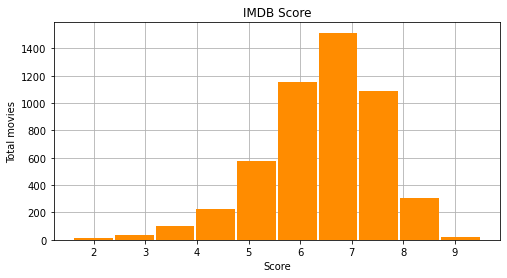

In [12]:
# Plotting imdb score
ax = movies_num["imdb_score"].hist(figsize=(8, 4), color="darkorange", zorder=2, rwidth=0.95)
ax.set(title="IMDB Score", xlabel="Score", ylabel="Total movies")
plt.show()

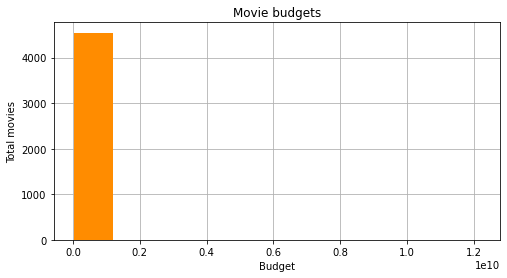

In [13]:
# Plotting budget of the films
ax = movies_num["budget"].hist(figsize=(8, 4), color="darkorange", zorder=2, rwidth=0.95)
ax.set(title="Movie budgets", xlabel="Budget", ylabel="Total movies")
plt.show()

In [14]:
# Displaying movies with budget > 1e9
movies[(movies_num["budget"] > 1e9)]

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
2323,Princess Mononoke,1997.0,Color,1.85,134.0,Japanese,Japan,134.0,Adventure|Animation|Fantasy,PG-13,anime|cult film|forest|princess|studio ghibli,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2710,2.400000e+09,8.4,2298191.0
2334,Steamboy,2004.0,Color,1.85,103.0,Japanese,Japan,103.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,PG-13,19th century|ball|boy|inventor|steam,Katsuhiro Ôtomo,William Hootkins,Robin Atkin Downes,Rosalind Ayres,991,2.127520e+09,6.9,410388.0
2988,The Host,2006.0,Color,1.85,110.0,Korean,South Korea,110.0,Comedy|Drama|Horror|Sci-Fi,R,daughter|han river|monster|river|seoul,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,1173,1.221550e+10,7.0,2201412.0
3005,Fateless,2005.0,Color,2.35,134.0,Hungarian,Hungary,134.0,Drama|Romance|War,R,bus|death|gay slur|hatred|jewish,Lajos Koltai,Marcell Nagy,Péter Fancsikai,Bálint Péntek,11,2.500000e+09,7.1,195888.0
3423,Akira,1988.0,Color,1.85,124.0,Japanese,Japan,124.0,Action|Animation|Sci-Fi,R,based on manga|biker gang|gifted child|post th...,Katsuhiro Ôtomo,Mitsuo Iwata,Takeshi Kusao,Tesshô Genda,28,1.100000e+09,8.1,439162.0
3859,Lady Vengeance,2005.0,Color,2.35,112.0,Korean,South Korea,112.0,Crime|Drama,R,cake|christian|lesbian sex|oral sex|pregnant s...,Chan-wook Park,Min-sik Choi,Yeong-ae Lee,Hye-jeong Kang,907,4.200000e+09,7.7,211667.0


The columns "budget" and "gross" aren't consistent. They are in different country currencies.
We need to clean these values.

### Cleaning the data

In [15]:
# Importing financial values of the movie from another database
financials = pd.read_csv("datasets/thenumbers.csv")
financials.head(5)

,Unnamed: 0,movie_name,domestic_gross,movie_link,production_budget,release_date,worldwide_gross,movie_title
0,0,Avatar,760507625,http://www.the-numbers.com/movie/Avatar#tab=su...,425000000,12/18/2009,2783918982,Avatar
1,1,Star Wars Ep. VII: The Force Awakens,936662225,http://www.the-numbers.com/movie/Star-Wars-Ep-...,306000000,12/18/2015,2058662225,Star Wars: Episode VII - The Force Awakens ...
2,2,Pirates of the Caribbean: At World's End,309420425,http://www.the-numbers.com/movie/Pirates-of-th...,300000000,5/24/2007,963420425,Pirates of the Caribbean: At World's End
3,3,Spectre,200074175,http://www.the-numbers.com/movie/Spectre#tab=s...,300000000,11/6/2015,879620923,Spectre
4,4,The Dark Knight Rises,448139099,http://www.the-numbers.com/movie/Dark-Knight-R...,275000000,7/20/2012,1084439099,The Dark Knight Rises


In [16]:
financials = financials[["movie_title", "production_budget", "worldwide_gross"]]
financials.sample(5)

,movie_title,production_budget,worldwide_gross
2081,The Touch,20000000,5918742
2813,Owning Mahowny,10000000,1011054
2624,The Dangerous Lives of Altar Boys,12000000,1779284
4183,Graduation Day,250000,23894000
2592,Tales from the Crypt: Demon Knight,12000000,21089146


In [17]:
# Setting movie title en numerical dataframe
movies_num = pd.concat([movies_num, movies["movie_title"]], axis=1)
movies_num.sample(5)

,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross,movie_title
713,2007.0,2.35,100.0,100.0,NaN,5.9,168213584.0,Wild Hogs
4227,2014.0,NaN,90.0,90.0,2500000.0,6.9,NaN,8 Days
2591,2013.0,2.35,110.0,110.0,16000000.0,6.7,NaN,Zulu
505,2005.0,2.35,102.0,102.0,52000000.0,4.2,1891821.0,A Sound of Thunder
4860,1997.0,1.85,90.0,90.0,365000.0,7.3,489220.0,Cube


In [18]:
# Merging financial data with numerical dataframe
movie_dataset = pd.merge(financials, movies_num, on="movie_title", how="left")
movie_dataset.head(5)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,250000000.0,8.5,448130642.0


In [19]:
# Checking dimensions on the new dataset
movie_dataset.shape

(4385, 10)

In [20]:
# Checking null/ nan
movie_dataset.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4050,4385.0,3714


In [21]:
(movie_dataset != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4385.0,4385.0,4385.0


In [22]:
# Counting all the null and nan values
available = (movie_dataset.notnull()) & (movie_dataset != 0)
available.all(axis=1).value_counts()

True     3413
False     972
dtype: int64

In [23]:
# Cleaning the target variable
movie_dataset = movie_dataset[available["worldwide_gross"]]
movie_dataset.shape

(4104, 10)

In [24]:
# Using the tools of sklearn, we are replacing the nan values for the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [25]:
# Creating new set of numeric data
movies_values = movie_dataset.drop("movie_title", axis=1)
movies_values = movies_values.drop("duration.1", axis=1)
movies_values.head(5)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,budget,imdb_score,gross
0,425000000,2783918982,2009.0,1.78,178.0,237000000.0,7.9,760505847.0
1,306000000,2058662225,NaN,NaN,NaN,NaN,7.1,NaN
2,300000000,963420425,2007.0,2.35,169.0,300000000.0,7.1,309404152.0
3,300000000,879620923,2015.0,2.35,148.0,245000000.0,6.8,200074175.0
4,275000000,1084439099,2012.0,2.35,164.0,250000000.0,8.5,448130642.0


In [26]:
values = imputer.fit_transform(movies_values)
X = pd.DataFrame(values)
X.columns = movies_values.columns
X.index = movies_values.index
X.head(5)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08


In [27]:
# Setting data Y (target)
Y = X["worldwide_gross"]
X = X.drop("worldwide_gross", axis=1)

### Implementing test data separation

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

### Setting the first machine learning model

In [29]:
from sklearn.linear_model import Lasso

# Instancing the model
model = Lasso()

In [30]:
model = model.fit(X_train, Y_train)

### Checking the model

In [31]:
predicted = model.predict(X_test)

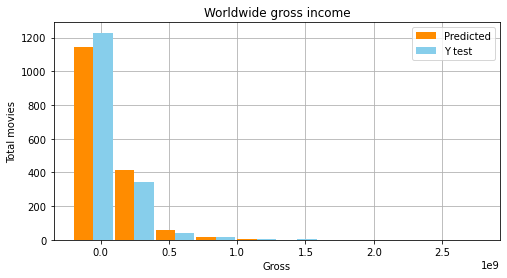

In [32]:
# Plotting results
plt.figure(figsize=(8, 4))
plt.hist([predicted, Y_test], color=["darkorange", "skyblue"], zorder=2, rwidth=0.95)
plt.title("Worldwide gross income")
plt.xlabel("Gross")
plt.ylabel("Total movies")
plt.legend(["Predicted", "Y test"])
plt.grid()
plt.show()

### Displaying the score (performance) of the model

In [33]:
model_score = np.round(model.score(X_test, Y_test), 4)
print(f"The score of the first model is {model_score}.")

The score of the first model is 0.8564.


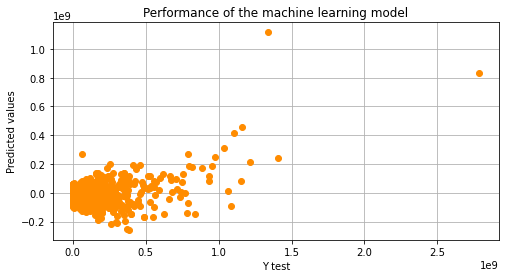

In [34]:
### Plotting residuals
residuals = Y_test - predicted
plt.figure(figsize=(8, 4))
plt.scatter(Y_test, residuals, color="darkorange", zorder=2)
plt.title("Performance of the machine learning model")
plt.xlabel("Y test")
plt.ylabel("Predicted values")
plt.grid()
plt.show()

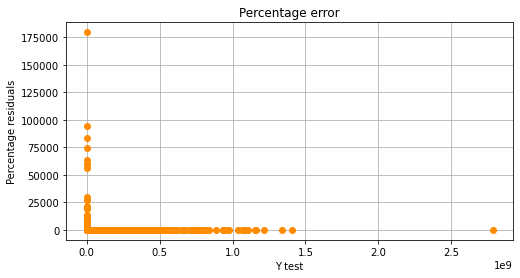

In [35]:
# Checking percentage error
ap_residuals = np.abs(residuals) / Y_test

plt.figure(figsize=(8, 4))
plt.scatter(Y_test, ap_residuals, color="darkorange", zorder=2)
plt.title("Percentage error")
plt.xlabel("Y test")
plt.ylabel("Percentage residuals")
plt.grid()
plt.show()

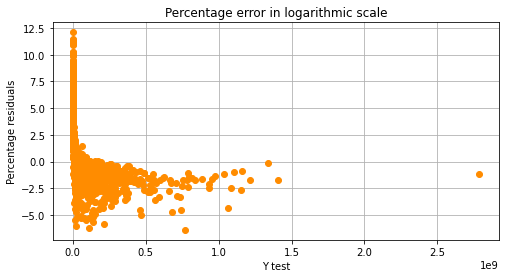

In [36]:
# Displaying percentage error in logarithmic scale
log_ap_residuals = np.log(ap_residuals)

plt.figure(figsize=(8, 4))
plt.scatter(Y_test, log_ap_residuals, color="darkorange", zorder=2)
plt.title("Percentage error in logarithmic scale")
plt.xlabel("Y test")
plt.ylabel("Percentage residuals")
plt.grid()
plt.show()

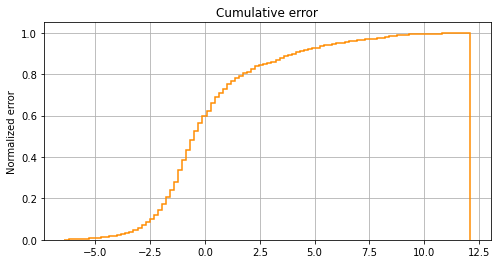

In [37]:
# Displaying cumulative error
plt.figure(figsize=(8, 4))
plt.hist(log_ap_residuals, bins=100, density=True, histtype="step", cumulative=True, color="darkorange", zorder=2, linewidth=1.5)
plt.title("Cumulative error")
plt.ylabel("Normalized error")
plt.grid()
plt.show()

### Checking correlation between dataset to generate feature engineering

In [38]:
# Calculating the correlation matrix
corr = X.corr()
corr

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross
production_budget,1.000000,0.207884,0.077459,0.276407,0.185357,0.033154,0.642562
title_year,0.207884,1.000000,0.130532,-0.137662,0.048664,-0.178685,0.014154
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.011340,0.037765,0.030225
duration,0.276407,-0.137662,-0.012645,1.000000,0.064252,0.315642,0.238216
budget,0.185357,0.048664,0.011340,0.064252,1.000000,0.019417,0.102666
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.019417,1.000000,0.201331
gross,0.642562,0.014154,0.030225,0.238216,0.102666,0.201331,1.000000


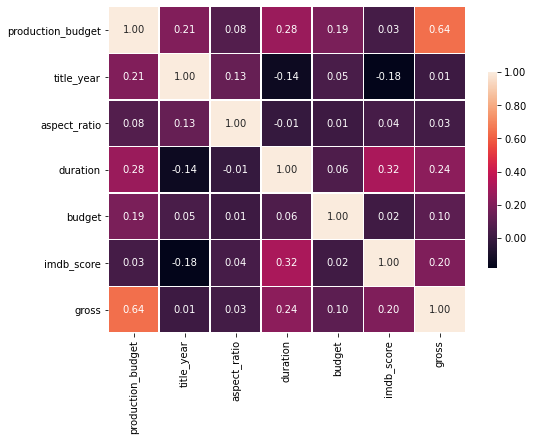

In [39]:
# Setting up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Drawing the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.3, cbar_kws={"shrink": .6, "format": "%.2f"})
plt.show()

### Feature engineering

In [40]:
# Checking feature influence
model_coef = np.floor(np.log10(np.abs(model.coef_)))
model_coef

array([ 0.,  5.,  6.,  4., -2.,  6.,  0.])

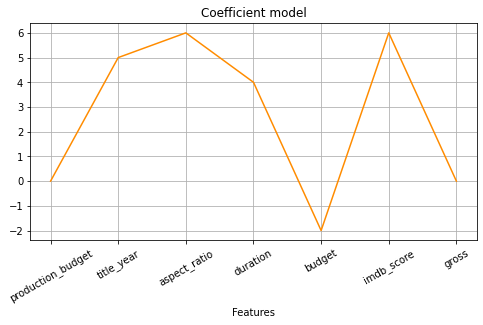

In [41]:
# Plotting coefficients
plt.figure(figsize=(8, 4))
plt.plot(model_coef, color="darkorange", zorder=2, linewidth=1.5)
plt.title("Coefficient model")
plt.xlabel("Features")
plt.xticks(np.arange(7), list(X.columns), rotation=30)
plt.grid()
plt.show()

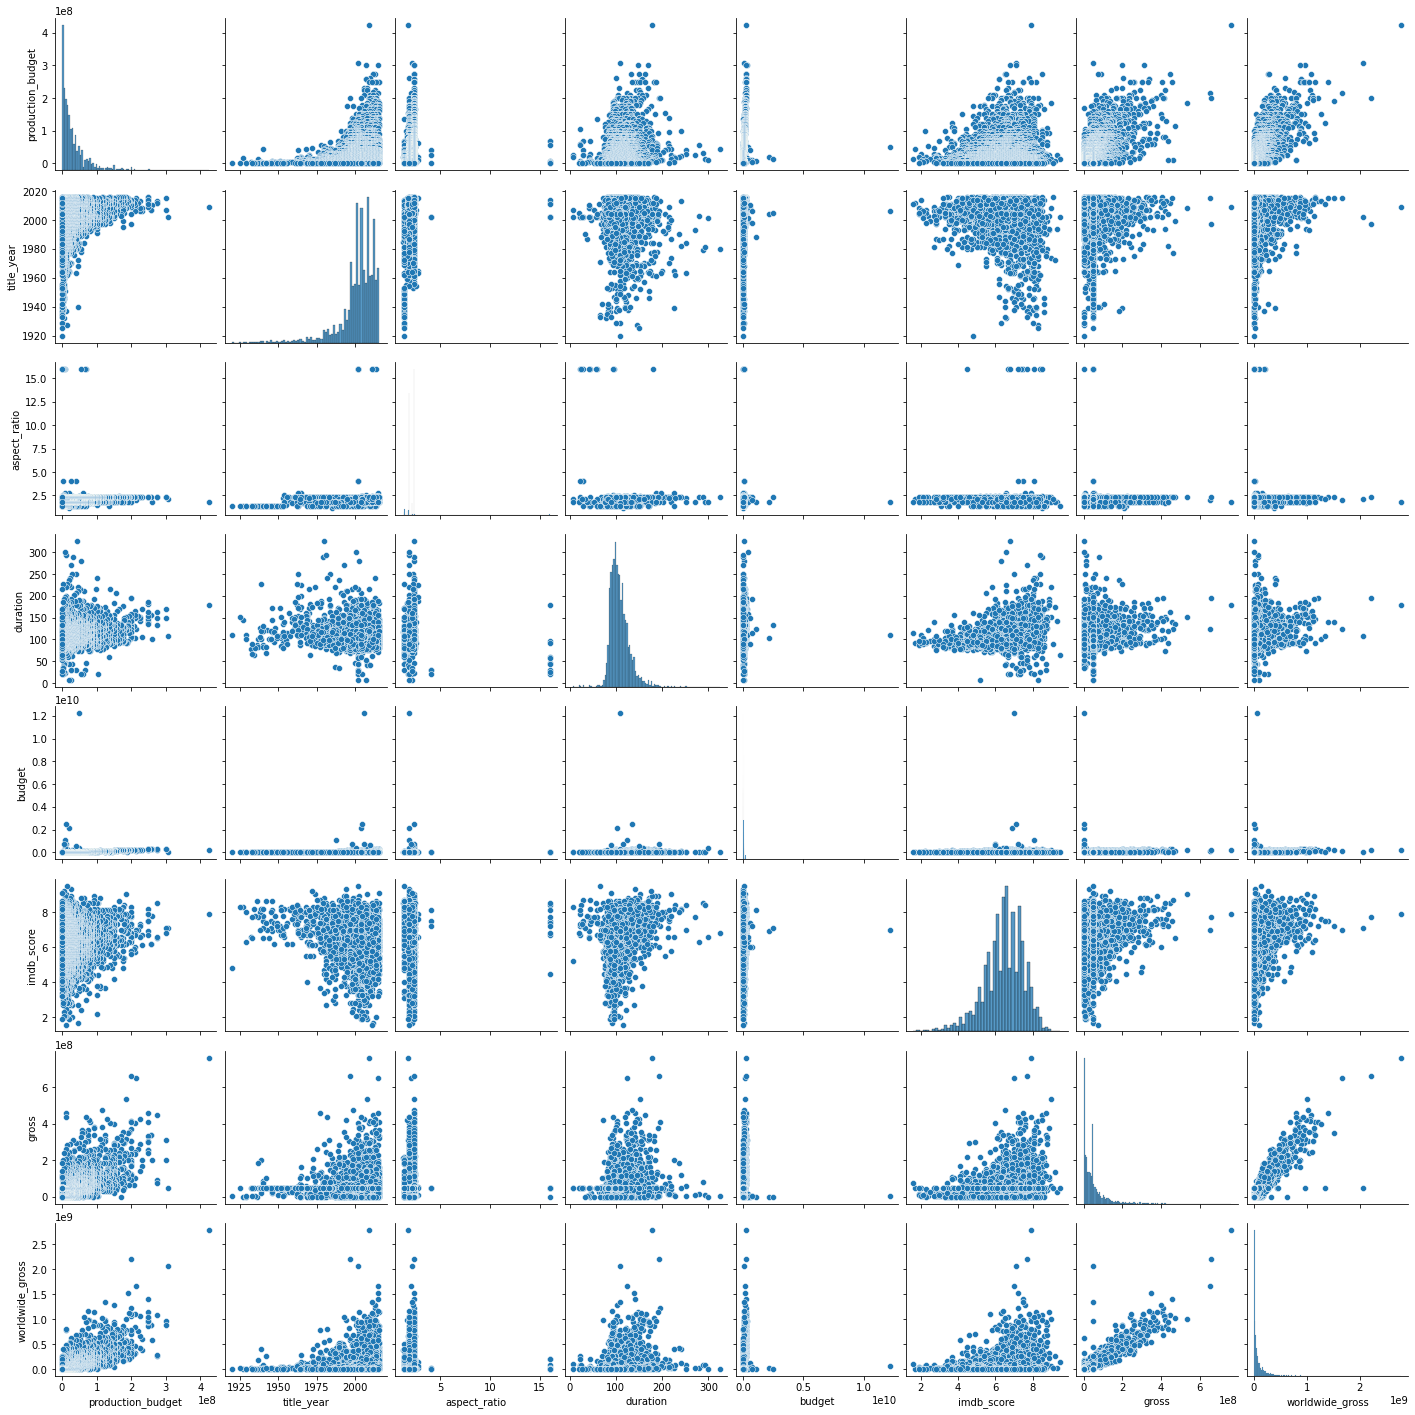

In [42]:
# Checking correlation between features and target variable
Z = pd.concat([X, Y], axis=1)

sns.pairplot(Z)
plt.show()

In [43]:
# Organizing dataset by budget categories (8 in total)
budget_class = pd.cut(X["production_budget"], 8).cat.codes.rename("class")
X_class = pd.concat([X, budget_class], axis=1)
X_class.head(5)

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross,class
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08,7
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07,5
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08,5
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08,5
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08,5


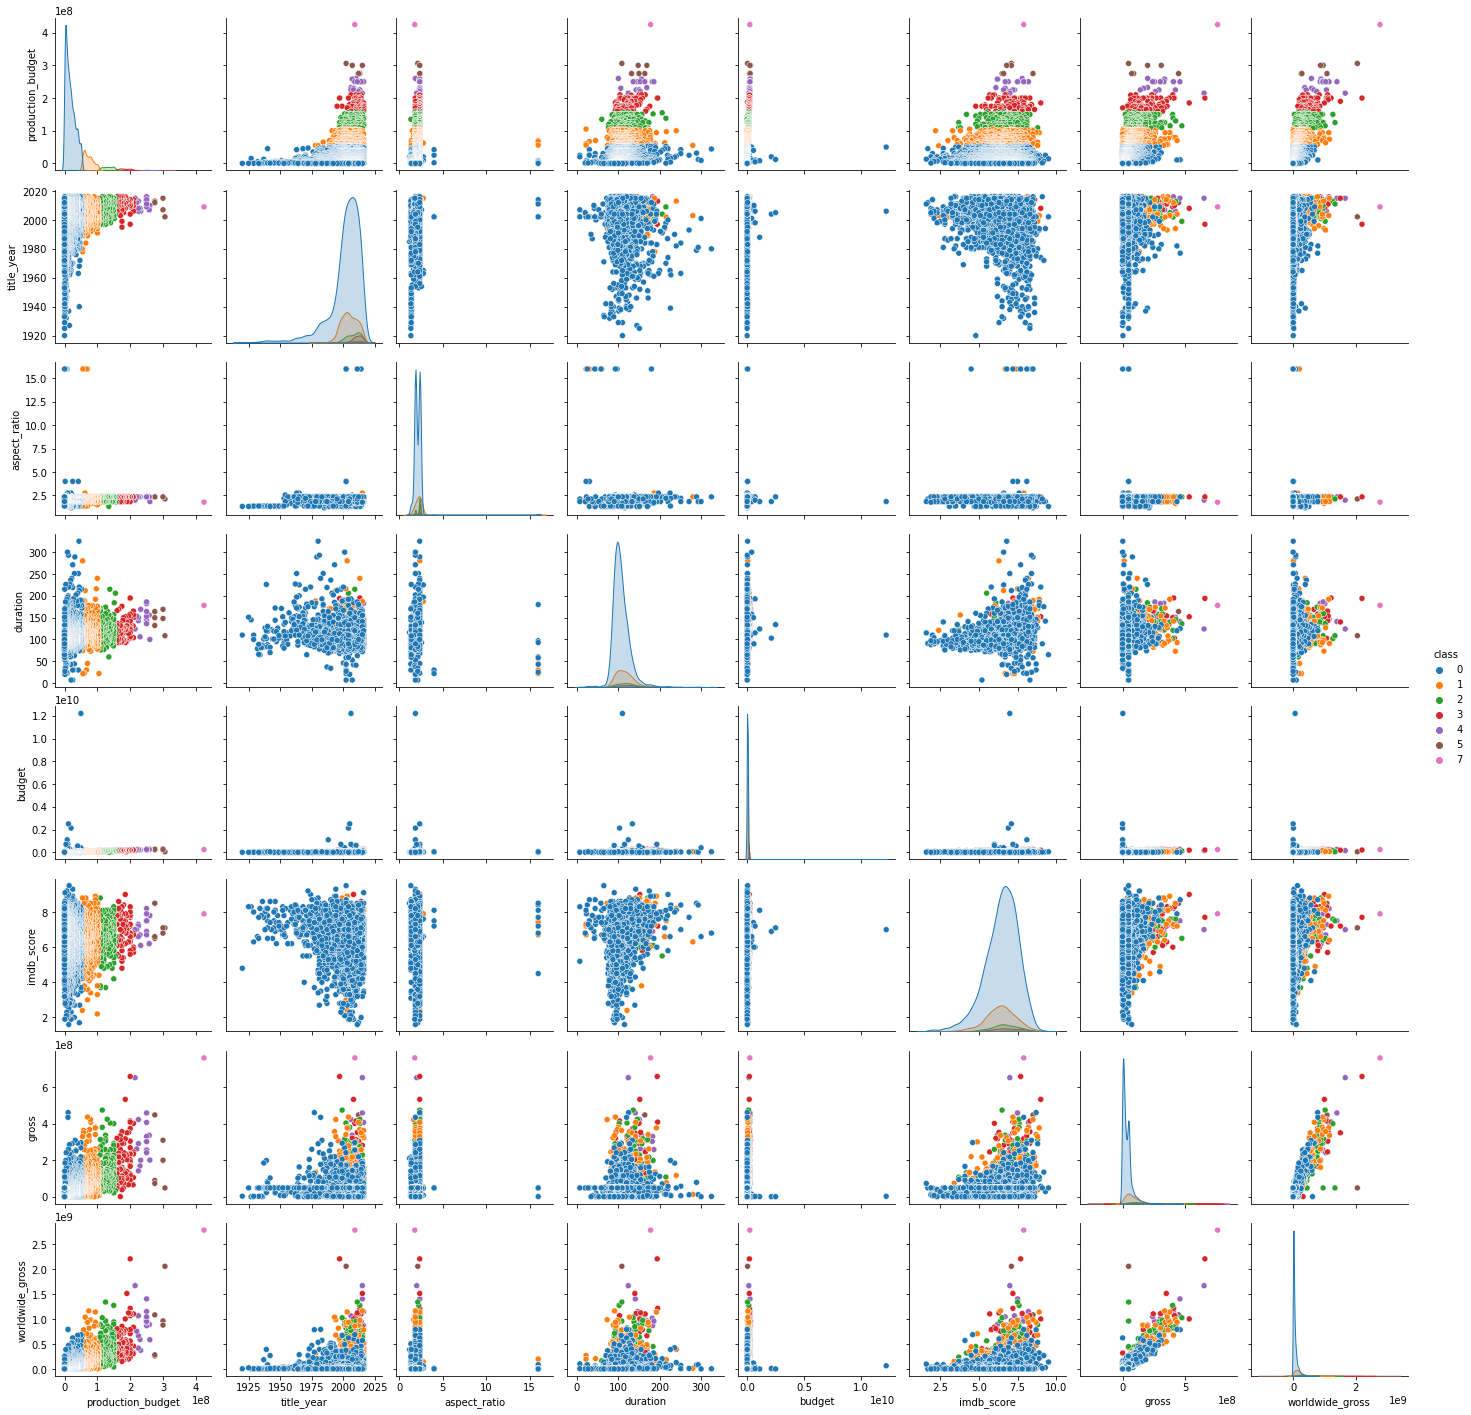

In [44]:
# Drawing new pairplot
Z_class = pd.concat([X_class, Y], axis=1)

sns.pairplot(Z_class, hue="class", palette="tab10")
plt.show()

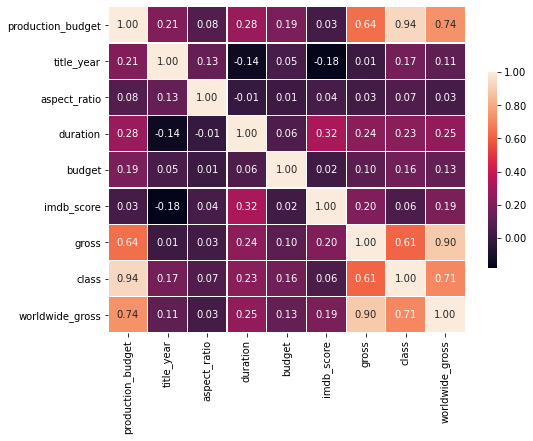

In [45]:
# Checking the new correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(Z_class.corr(), annot=True, fmt=".2f", linewidth=0.3, cbar_kws={"shrink": .6, "format": "%.2f"})
plt.show()

The most relevant variables to the target (worlwide gross income) are:
<ul>
    <li>Production budget.</li>
    <li>Duration.</li>
    <li>Imdb score.</li>
</ul>

### Automatic feature selection according Sklearn

In [46]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X, Y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x0000014CEBFA81F0>)

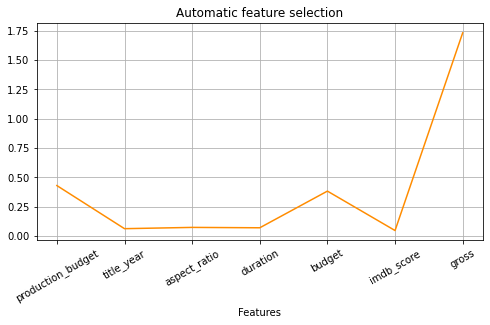

In [47]:
# Checking selected features
feature_scores = selector.scores_

plt.figure(figsize=(8, 4))
plt.plot(feature_scores, color="darkorange", zorder=2, linewidth=1.5)
plt.title("Automatic feature selection")
plt.xlabel("Features")
plt.xticks(np.arange(7), list(X.columns), rotation=30)
plt.grid()
plt.show()

### Defining new dataset with selected features

In [48]:
X2 = X[["production_budget", "title_year", "duration", "imdb_score"]]
X2.sample(5)

,production_budget,title_year,duration,imdb_score
2360,15000000.0,2005.0,106.0,6.4
2406,15000000.0,1985.0,142.0,8.0
3102,7000000.0,2004.0,192.0,7.9
782,55000000.0,2008.0,99.0,5.8
1696,25000000.0,2004.0,98.0,7.2


In [49]:
# New training of the model
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y)
model_2 = Lasso()
model_2 = model_2.fit(X2_train, Y2_train)

In [50]:
# Checking the score (performance) of the new model
model_2_score = np.round(model_2.score(X2_test, Y2_test), 4)
print(f"The score of the second model is {model_2_score}, while the score of the first model was {model_score}.")

The score of the second model is 0.5959, while the score of the first model was 0.8564.


### Data standardization and scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Initializing instance
scaler = StandardScaler()
scaler = scaler.fit(X_train)

In [52]:
# Mean by feature
scaler.mean_

array([3.35605132e+07, 2.00193586e+03, 2.12731923e+00, 1.08845608e+02,
       3.89977367e+07, 6.48456539e+00, 4.97980004e+07])

In [53]:
# Standard desviation by feature
scaler.scale_

array([4.05884593e+07, 1.20016270e+01, 7.40252688e-01, 2.31734901e+01,
       8.16334067e+07, 1.06296748e+00, 6.51916726e+07])

In [54]:
# Generating scaled dataset
X_scaled = pd.DataFrame(scaler.transform(X_train))
X_scaled.head(5)

,0,1,2,3,4,5,6
0,-0.309460,0.588598,0.300817,-0.468018,-0.269470,0.578978,-0.619205
1,1.119517,0.755242,-0.374628,-0.770087,0.490023,-2.901844,0.373670
2,-0.823523,0.755242,-0.374628,-1.029004,0.017856,0.202673,-0.757649
3,-0.679023,-0.077978,-0.374628,-0.122796,-0.404219,-0.173632,-0.342691
4,1.144155,0.755242,0.300817,-0.295407,0.502273,-1.208471,0.468815


In [55]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [56]:
# Training model with scaled dataset
model_scaled = Lasso()
model_scaled = model_scaled.fit(X_train_scaled, Y_train)

In [57]:
# Checking the score (performance) of the scaled model
model_scaled_score = np.round(model_scaled.score(X_test_scaled, Y_test), 4)
print(f"The score of the scaled model is {model_scaled_score}, while the score of the first model was {model_score}.")

The score of the scaled model is 0.8564, while the score of the first model was 0.8564.


From the previous result, we can see that regressions don´t need data scaling. <br>
Another altenative to make transformation, it´s using pipeline.

In [58]:
from sklearn.pipeline import make_pipeline

model_scaled_pipeline = make_pipeline(StandardScaler(), Lasso())
model_scaled_pipeline = model_scaled_pipeline.fit(X_train, Y_train)

In [59]:
model_scaled_pipeline_score = np.round(model_scaled_pipeline.score(X_test, Y_test), 4)
print(f"The score of the scaled model with pipeline is {model_scaled_pipeline_score}.")

The score of the scaled model with pipeline is 0.8564.


### Automatic feature generation

In [60]:
from sklearn.preprocessing import PolynomialFeatures
transformer = PolynomialFeatures(2)
transformer = transformer.fit_transform(X)

In [61]:
# Checking new dimension of the dataset
transformer.shape

(4104, 36)

In [62]:
# Training the model with the new dataset
model_poly = make_pipeline(PolynomialFeatures(2), Lasso())
model_poly = model_poly.fit(X_train, Y_train)
model_poly_score = np.round(model_poly.score(X_test, Y_test), 4)
print(f"The score of the model polynomic is {model_poly_score}.")

The score of the model polynomic is 0.8296.


### Managing categorical features

In [63]:
# Checking number of categorical features
movies_obj.apply(pd.Series.nunique).sort_values(ascending=True)

color                2
content_rating      18
language            47
country             65
genres             914
actor_1_name      2097
director_name     2398
actor_2_name      3032
actor_3_name      3521
plot_keywords     4760
movie_title       4917
dtype: int64

#### Using binary encoding

In [64]:
# Installing category_encoders
!pip install category_encoders

In [65]:
# Working with data about "actor name" and "director name"
categoricals = {
    "actor_1_name": movies_obj["actor_1_name"].values,
    "director_name": movies_obj["director_name"].values
}
categoricals = pd.DataFrame(categoricals).fillna(0)
categoricals.head(5)

,actor_1_name,director_name
0,CCH Pounder,James Cameron
1,Johnny Depp,Gore Verbinski
2,Christoph Waltz,Sam Mendes
3,Tom Hardy,Christopher Nolan
4,Doug Walker,Doug Walker


In [66]:
# Creating a new dataset
X_binenc = X
X_binenc = pd.concat([X_binenc, categoricals], axis=1, join="inner")
X_binenc.head(5)

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross,actor_1_name,director_name
0,425000000.0,2009.000000,1.780000,178.000000,2.370000e+08,7.9,7.605058e+08,CCH Pounder,James Cameron
1,306000000.0,2002.130733,2.126976,108.577186,4.045539e+07,7.1,4.831933e+07,Johnny Depp,Gore Verbinski
2,300000000.0,2007.000000,2.350000,169.000000,3.000000e+08,7.1,3.094042e+08,Christoph Waltz,Sam Mendes
3,300000000.0,2015.000000,2.350000,148.000000,2.450000e+08,6.8,2.000742e+08,Tom Hardy,Christopher Nolan
4,275000000.0,2012.000000,2.350000,164.000000,2.500000e+08,8.5,4.481306e+08,Doug Walker,Doug Walker


In [67]:
# Checking dimension of the dataset
X_binenc.shape

(4104, 9)

In [68]:
# Using binary encoding
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["actor_1_name", "director_name"])

In [69]:
X_binenc = encoder.fit_transform(X_binenc)
X_binenc.sample(5)

,production_budget,title_year,aspect_ratio,duration,budget,imdb_score,gross,actor_1_name_0,actor_1_name_1,actor_1_name_2,...,director_name_2,director_name_3,director_name_4,director_name_5,director_name_6,director_name_7,director_name_8,director_name_9,director_name_10,director_name_11
694,60000000.0,2000.0,1.850000,152.0,60000000.0,7.9,3.252235e+07,0,0,0,...,0,0,1,0,1,1,0,0,1,1
3552,3000000.0,2012.0,2.350000,110.0,3000000.0,6.8,4.805694e+07,0,0,0,...,0,1,1,1,0,1,0,1,0,0
3541,3250000.0,1999.0,2.126976,92.0,2000000.0,6.4,7.680000e+03,0,1,0,...,0,1,1,1,0,0,1,1,0,1
242,109000000.0,2001.0,2.350000,165.0,107000000.0,6.8,5.818397e+07,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1681,26000000.0,2014.0,1.850000,107.0,26000000.0,5.4,4.831933e+07,0,0,0,...,1,0,1,1,0,1,0,0,0,0


In [70]:
X_bin_train, X_bin_test, Y_bin_train, Y_bin_test = train_test_split(X_binenc, Y)
model_binenc = Lasso()

In [71]:
# New model training
model_binenc = model_binenc.fit(X_bin_train, Y_bin_train)
model_binenc_score = np.round(model_binenc.score(X_bin_test, Y_bin_test), 4)
print(f"The score of the binary enconded model is {model_binenc_score}, while the score of the first model was {model_score}.")

The score of the binary enconded model is 0.8168, while the score of the first model was 0.8564.


### Cross Validation
With 5 folds

In [72]:
from sklearn.model_selection import cross_val_score, cross_validate
cross_scores = cross_val_score(Lasso(), X, Y, cv=5, scoring="r2")
print(f"The scores from the cross validation are {np.round(cross_scores, 4)}.")
print(f"The mean score is {np.round(cross_scores.mean(), 4)}.")

The scores from the cross validation are [ 0.7226  0.7156  0.7097  0.6679 -0.7956].
The mean score is 0.404.


In [73]:
# Another alternative
cross_validate_result = cross_validate(Lasso(), X, Y, cv=5, return_train_score=True)
cross_validate_result

{'fit_time': array([0.05517125, 0.03100181, 0.02700186, 0.02699852, 0.00399852]),
 'score_time': array([0.0030005 , 0.00200009, 0.00300026, 0.00200057, 0.00200033]),
 'test_score': array([ 0.72261248,  0.71560058,  0.70973226,  0.66793494, -0.79564494]),
 'train_score': array([0.76432051, 0.85867662, 0.8572559 , 0.85248409, 0.85481167])}

In [74]:
# Checking results
test_scores = cross_validate_result["test_score"]
train_scores = cross_validate_result["train_score"]
print(f"The mean of the test scores is {np.round(np.mean(test_scores), 4)}.")
print(f"The mean of the train scores is {np.round(np.mean(train_scores), 4)}.")

The mean of the test scores is 0.404.
The mean of the train scores is 0.8375.


### Validation curves and learning curves
#### Neighbors Regression

In [75]:
from sklearn.neighbors import KNeighborsRegressor

kneighbors_model = cross_validate(KNeighborsRegressor(n_neighbors=5), X, Y, cv=5)
kneighbors_model

{'fit_time': array([0.01899719, 0.00800061, 0.00799727, 0.00800061, 0.00800133]),
 'score_time': array([0.00800085, 0.00600052, 0.00600052, 0.00500035, 0.0049994 ]),
 'test_score': array([0.56530426, 0.69542081, 0.72371925, 0.77763627, 0.58539293])}

#### Validation curve

In [76]:
from sklearn.model_selection import validation_curve

# Parameter range
n = np.arange(2, 50, 2)

new_train_scores, new_test_scores = validation_curve(KNeighborsRegressor(),
                                                    X,
                                                    Y,
                                                    param_name="n_neighbors",
                                                    param_range=n,
                                                    cv=5)

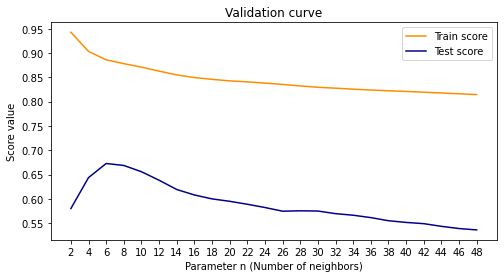

In [77]:
# Plotting results
plt.figure(figsize=(8, 4))
plt.plot(np.mean(new_train_scores, axis=1), color="darkorange", zorder=2, linewidth=1.5)
plt.plot(np.mean(new_test_scores, axis=1), color="darkblue", zorder=2, linewidth=1.5)
plt.title("Validation curve")
plt.ylabel("Score value")
plt.xlabel("Parameter n (Number of neighbors)")
plt.xticks(np.arange(24), n)
plt.legend(["Train score", "Test score"])
plt.show()

Best number of neighbors around 6.

#### Learning curve

In [78]:
from sklearn.model_selection import learning_curve
lc = learning_curve(KNeighborsRegressor(n_neighbors=6), X, Y, cv=5)
lc

(array([ 328, 1066, 1805, 2544, 3283]),
 array([[0.80131037, 0.77251078, 0.77251078, 0.77251078, 0.77251078],
        [0.80349782, 0.8631887 , 0.85714939, 0.85714939, 0.85714939],
        [0.82635561, 0.88119207, 0.87671293, 0.87225444, 0.87225444],
        [0.84283507, 0.89270917, 0.89043618, 0.88210604, 0.88160372],
        [0.85275009, 0.89862456, 0.89790725, 0.89156176, 0.8890798 ]]),
 array([[ 0.50254249, -0.09905339, -0.47516313, -1.46981252, -9.61702453],
        [ 0.51173903,  0.63290491,  0.57172005,  0.47399519, -0.48288148],
        [ 0.52007537,  0.69674574,  0.68305706,  0.48422912, -1.69318357],
        [ 0.55336823,  0.72249915,  0.72277455,  0.76909018,  0.32938326],
        [ 0.55336821,  0.72248276,  0.72398999,  0.76562101,  0.59922689]]))

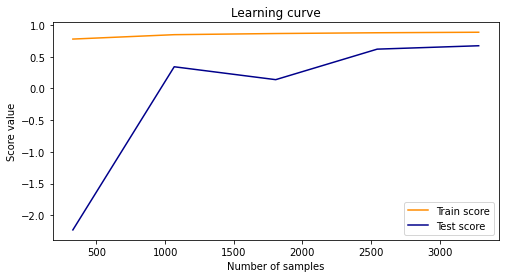

In [79]:
# Saving results from learning curve
samples, lc_train, lc_test = lc[0], lc[1], lc[2]

# Plotting results
plt.figure(figsize=(8, 4))
plt.plot(samples, np.mean(lc_train, axis=1), color="darkorange", zorder=2, linewidth=1.5)
plt.plot(samples, np.mean(lc_test, axis=1), color="darkblue", zorder=2, linewidth=1.5)
plt.title("Learning curve")
plt.ylabel("Score value")
plt.xlabel("Number of samples")
plt.legend(["Train score", "Test score"])
plt.show()

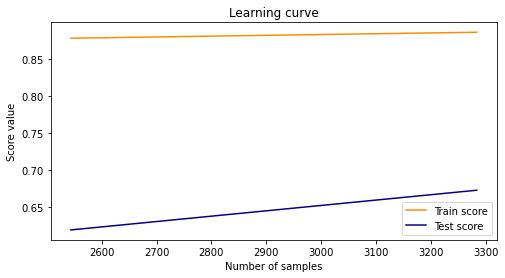

In [80]:
# Zooming results
plt.figure(figsize=(8, 4))
plt.plot(samples[3:], np.mean(lc_train, axis=1)[3:], color="darkorange", zorder=2, linewidth=1.5)
plt.plot(samples[3:], np.mean(lc_test, axis=1)[3:], color="darkblue", zorder=2, linewidth=1.5)
plt.title("Learning curve")
plt.ylabel("Score value")
plt.xlabel("Number of samples")
plt.legend(["Train score", "Test score"])
plt.show()

### Decision Tree

In [81]:
# Installing graphviz
!pip install graphviz

# Including temporarely these binaries files in the PATH
import os
os.environ["PATH"] += os.pathsep + "C:\anaconda3\Library\bin\graphviz"

In [82]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# Initializing and training model
model_tree = DecisionTreeRegressor(max_depth=2)
model_tree = model_tree.fit(X_train, Y_train)
treedot = export_graphviz(model_tree, out_file=None, feature_names=X.columns)

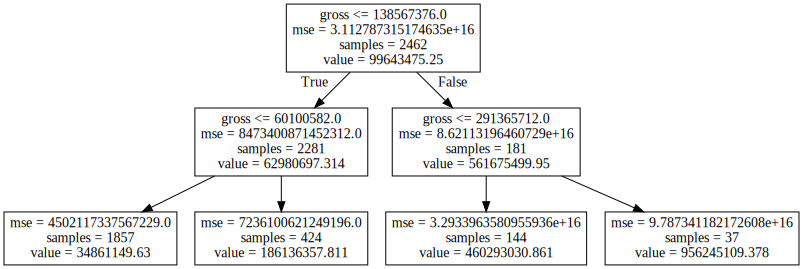

In [83]:
# Visualizing the result
graph_treedot = graphviz.Source(treedot)
graph_treedot

### Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Building model with n=200 tree
forest = RandomForestRegressor(200)
forest_result = cross_validate(forest, X, Y, cv=5, return_train_score=True, scoring="r2")

In [85]:
# Checking results
forest_test_score = forest_result["test_score"]
forest_train_score = forest_result["train_score"]
print(f"The mean of the test scores is {np.round(np.mean(forest_test_score), 4)}.")
print(f"The mean of the train scores is {np.round(np.mean(forest_train_score), 4)}.")

The mean of the test scores is 0.6918.
The mean of the train scores is 0.9821.


### Gradient Boosted Trees

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

# Building model with default parameters
gradient_boosted_model = GradientBoostingRegressor()
gradient_boosted_result = cross_validate(gradient_boosted_model, X, Y, cv=5, return_train_score=True, scoring="r2")

In [87]:
# Checking results
gradient_boosted_test_score = gradient_boosted_result["test_score"]
gradient_boosted_train_score = gradient_boosted_result["train_score"]
print(f"The mean of the test scores is {np.round(np.mean(gradient_boosted_test_score), 4)}.")
print(f"The mean of the train scores is {np.round(np.mean(gradient_boosted_train_score), 4)}.")

The mean of the test scores is 0.7069.
The mean of the train scores is 0.9391.


### Parameter Optimization
#### Grid search

In [88]:
from sklearn.model_selection import GridSearchCV

# Parameterss to test
param_test = {"n_estimators": np.arange(20, 501, 20)}

In [89]:
# Setting the estimator
grid_estimator = GradientBoostingRegressor(learning_rate=0.1,
                                          min_samples_split=500,
                                          min_samples_leaf=50,
                                          max_depth=8,
                                          max_features="sqrt",
                                          subsample=0.8,
                                          random_state=10)

In [90]:
# Applying the grid search
gsearch = GridSearchCV(grid_estimator,
                      param_grid=param_test,
                      scoring="r2",
                      cv=5)

gsearch = gsearch.fit(X_train, Y_train)

In [91]:
# Displaying results
grid_mean_test_scores = gsearch.cv_results_["mean_test_score"]
grid_std_test_scores = gsearch.cv_results_["std_test_score"]
grid_best_config = gsearch.best_params_, gsearch.best_score_

print(f"Mean test scores:\n {grid_mean_test_scores}.")
print(f"Std test scores:\n {grid_std_test_scores}.")
print(f"Best configuration: {grid_best_config}.")

Mean test scores:
 [0.70763913 0.78617051 0.80220105 0.80893853 0.81202764 0.81507347
 0.81590895 0.81828973 0.81844747 0.81984669 0.81934211 0.82027757
 0.8195118  0.81924289 0.81908025 0.81890916 0.81974895 0.81957614
 0.82015866 0.82111673 0.82128834 0.82134677 0.82024335 0.82034903
 0.81994398].
Std test scores:
 [0.05952526 0.0439363  0.04381577 0.04373548 0.04201957 0.04149809
 0.04181601 0.04220474 0.04205701 0.04248158 0.04235076 0.0430908
 0.0427775  0.04204777 0.04304509 0.04272686 0.04354414 0.04209503
 0.04255554 0.04333831 0.04227405 0.04268771 0.04310356 0.04261665
 0.0427428 ].
Best configuration: ({'n_estimators': 440}, 0.8213467709502306).


In [92]:
# Best estimator
gsearch.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=440,
                          random_state=10, subsample=0.8)

### Final result

In [93]:
final_result = cross_validate(gsearch.best_estimator_, X_train, Y_train, return_train_score=True)
final_result_test_score = final_result["test_score"]
final_result_train_score = final_result["train_score"]
print(f"The mean test score of the grid search model is {np.round(np.mean(final_result_test_score), 4)}.")
print(f"The mean train score of the grid search model is {np.round(np.mean(final_result_train_score), 4)}.")

The mean test score of the grid search model is 0.8213.
The mean train score of the grid search model is 0.896.
